## Mortality and Ventilator Duration with AKI Diagnosis

Set working directory using `setwd()` and read in the file

In [1]:
data <- read.csv('./merged 2.csv')

## Mortality
**Logistic regression** of `mortality` on `AKI`, `age`, `sepsis`, and `PRISM` score.

In [2]:
modelMort <- glm(mortality_v2 ~ as.factor(AKI.cat) + Admit.Age..yrs. + as.factor(Sepsis.Dx) + PRISM.III ,
family=binomial(link="logit"),data = data)

summary(modelMort)


Call:
glm(formula = mortality_v2 ~ as.factor(AKI.cat) + Admit.Age..yrs. + 
    as.factor(Sepsis.Dx) + PRISM.III, family = binomial(link = "logit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5736  -0.3940  -0.2967  -0.2280   2.7997  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -3.92012    0.35097 -11.170  < 2e-16 ***
as.factor(AKI.cat)1   -0.95229    0.52257  -1.822   0.0684 .  
as.factor(AKI.cat)2    0.39702    0.38699   1.026   0.3049    
Admit.Age..yrs.        0.04121    0.02310   1.784   0.0744 .  
as.factor(Sepsis.Dx)1 -0.29895    0.41905  -0.713   0.4756    
PRISM.III              0.10555    0.01719   6.138 8.35e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 389.07  on 722  degrees of freedom
Residual deviance: 334.71  on 717  degrees of freedom
  (4 observations deleted due

#### Odds Ratios

In [3]:
OddsRatio <- exp(modelMort$coef)

## confidence intervals
orCIp05 <- exp(confint(modelMort, level=0.95)) # alpha=0.05
cbind(OddsRatio, orCIp05)

Waiting for profiling to be done...



,OddsRatio,2.5 %,97.5 %
(Intercept),0.01983876,0.0095702,0.03804728
as.factor(AKI.cat)1,0.38585450,0.1226945,0.98582058
as.factor(AKI.cat)2,1.48738092,0.6751325,3.10147096
Admit.Age..yrs.,1.04206949,0.9961365,1.09092358
as.factor(Sepsis.Dx)1,0.74159748,0.3065544,1.60834652
PRISM.III,1.11131661,1.0750146,1.15040414


## Days on Ventilator

In [6]:
data[243,"MV.days"] =0 # fix data entry typo for obs 243 (52,093 ventilator days) 

In [7]:
summary(data[,"MV.days"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   2.000   5.000   5.804   8.000  42.000     345 

### Ventilator only 

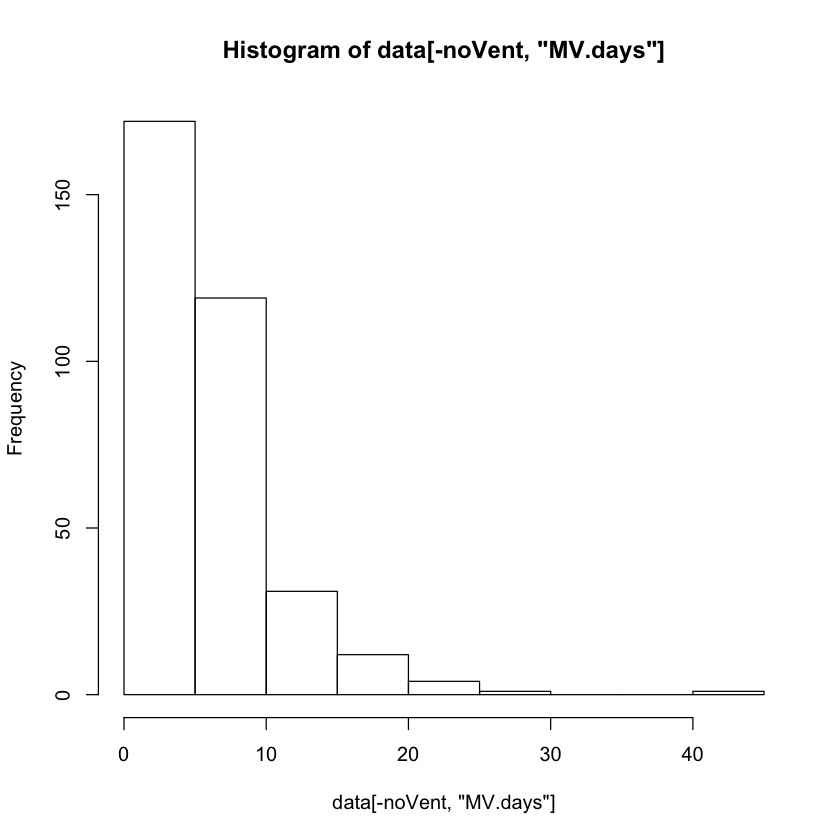

In [8]:
noVent <- which(data[,"MV.days"]==0) #not ventilated
hist(data[-noVent,"MV.days"]) # exclude those who were not ventilated

### Linear Regression (Ventilator Days)

Ordinary least squares linear regression of `ventilator_days` on `AKI`, `age`, `sepsis`, and `PRISM` score. **Excluding observations that were not ventilated**

In [9]:
modelVentiPure <- lm(MV.days ~ as.factor(AKI.cat) + Admit.Age..yrs. + as.factor(Sepsis.Dx) + PRISM.III, data = data[-noVent,])
summary(modelVentiPure)


Call:
lm(formula = MV.days ~ as.factor(AKI.cat) + Admit.Age..yrs. + 
    as.factor(Sepsis.Dx) + PRISM.III, data = data[-noVent, ])

Residuals:
   Min     1Q Median     3Q    Max 
-6.694 -3.338 -1.056  1.868 36.138 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            5.844400   0.536114  10.901   <2e-16 ***
as.factor(AKI.cat)1   -0.483050   0.781573  -0.618   0.5370    
as.factor(AKI.cat)2    0.811793   0.913192   0.889   0.3747    
Admit.Age..yrs.        0.008133   0.043646   0.186   0.8523    
as.factor(Sepsis.Dx)1 -0.698263   0.723596  -0.965   0.3353    
PRISM.III              0.065595   0.034987   1.875   0.0617 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.955 on 332 degrees of freedom
  (347 observations deleted due to missingness)
Multiple R-squared:  0.01995,	Adjusted R-squared:  0.00519 
F-statistic: 1.352 on 5 and 332 DF,  p-value: 0.2423
